In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for model building
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
#for comparing the models
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [2]:
#Reading the csv file
df=pd.read_csv("../data/Sample Data.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True) #useless column

In [4]:
df.shape

(6362620, 10)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [7]:
df.isnull().sum()#no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
#correlation
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


##DATA VISUALIZATION

###UNIVARIATE ANALYSIS

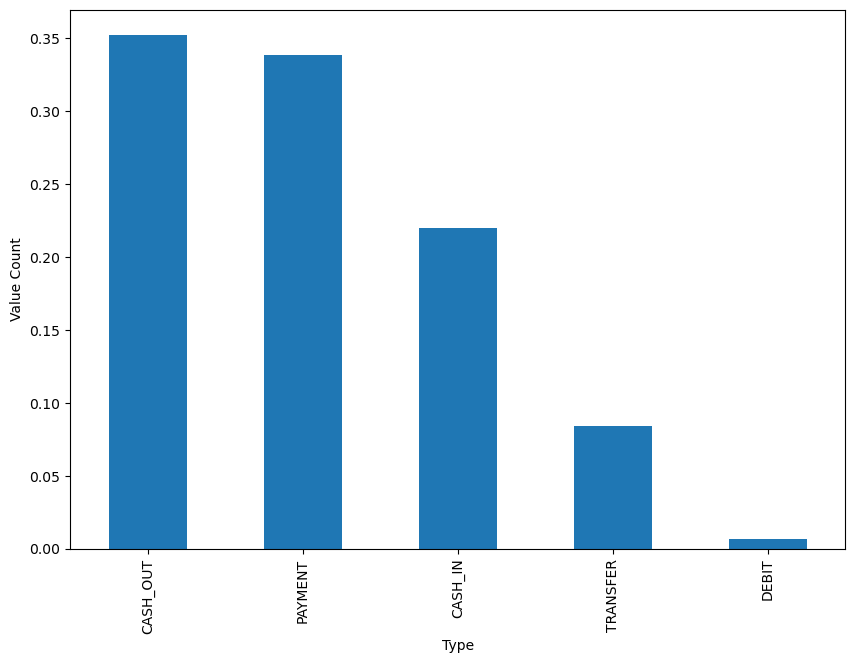

In [9]:
#univariate Analysis

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
df['type'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Value Count")
plt.show()


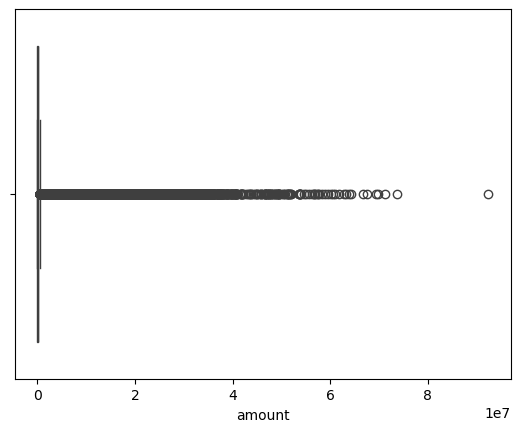

In [10]:
sns.boxplot(x=df["amount"])
plt.show() #UNIVARIATE AS WE ARE CONSIDERING ONE PARAMETER AT A TIME

<Axes: xlabel='type', ylabel='count'>

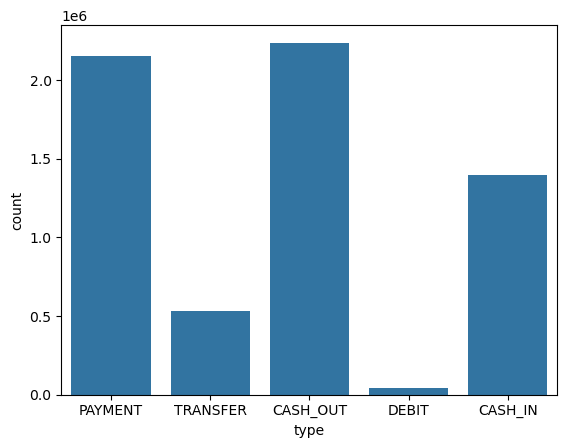

In [11]:
#type
sns.countplot(data=df,x="type")

C:\Users\hh200\AppData\Local\Temp\ipykernel_20352\2747375287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.amount)


<Axes: xlabel='amount', ylabel='Density'>

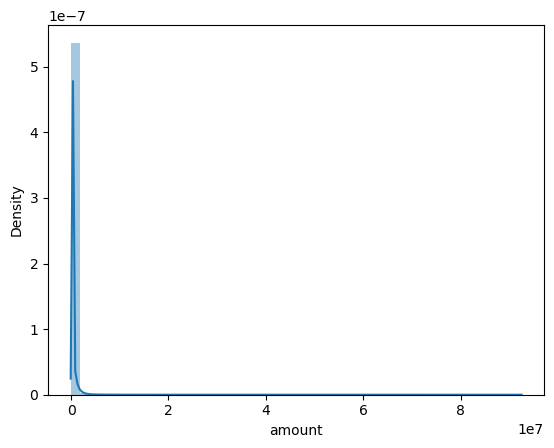

In [12]:
sns.distplot(df.amount)

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

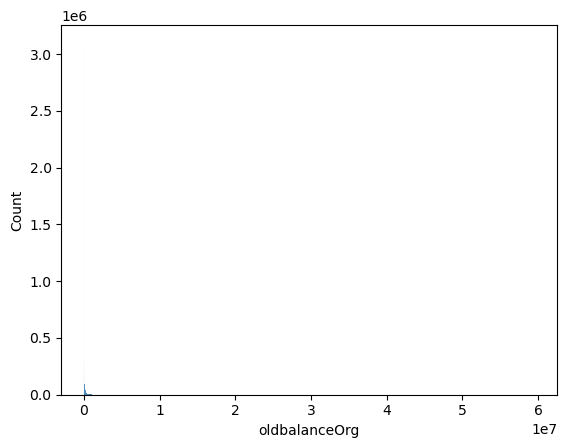

In [13]:
#oldbalanceOrg
sns.histplot(data=df,x="oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='count'>

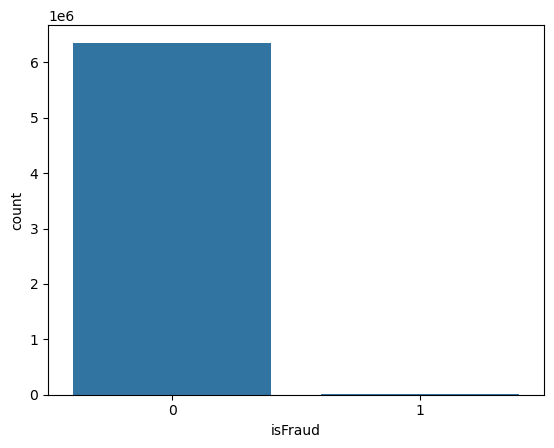

In [14]:
sns.countplot(data=df,x="isFraud")

In [15]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
df.loc[df["isFraud"]==0,"isFraud"] = "is not Fraud"
df.loc[df["isFraud"]==1,"isFraud"] = "is Fraud"

C:\Users\hh200\AppData\Local\Temp\ipykernel_20352\1302109281.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'is not Fraud' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["isFraud"]==0,"isFraud"] = "is not Fraud"


In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud


###BIVARIATE ANALYSIS

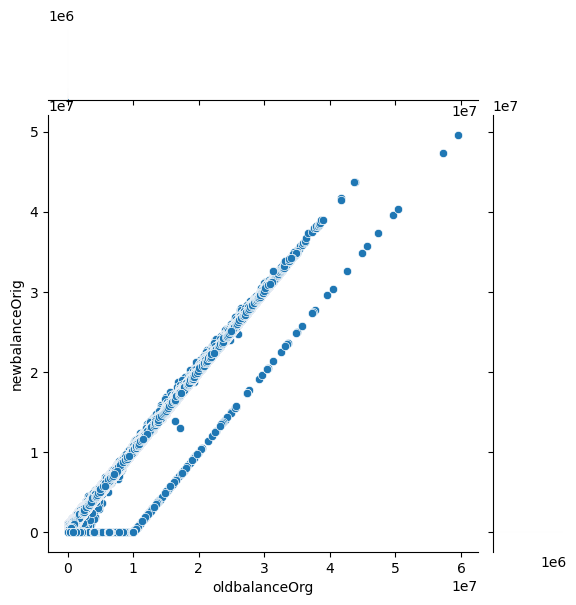

In [18]:
sns.jointplot(x='oldbalanceOrg',y='newbalanceOrig',data=df)

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

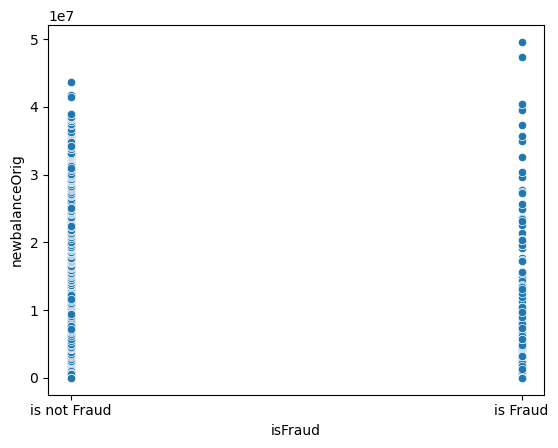

In [19]:
sns.scatterplot(x=df.isFraud,y=df.newbalanceOrig)

<Axes: xlabel='amount', ylabel='oldbalanceOrg'>

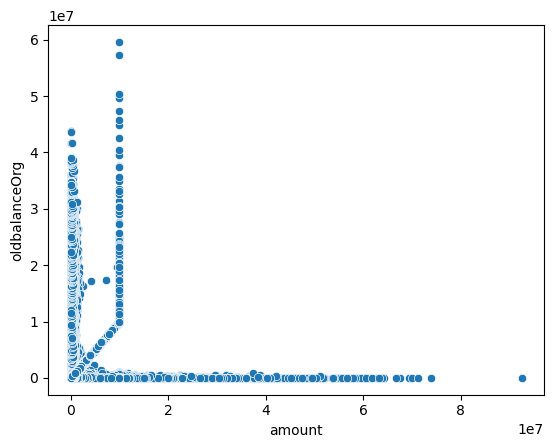

In [20]:
sns.scatterplot(x=df.amount,y=df.oldbalanceOrg)

###MULTIVARIATE ANALYSIS

<Axes: >

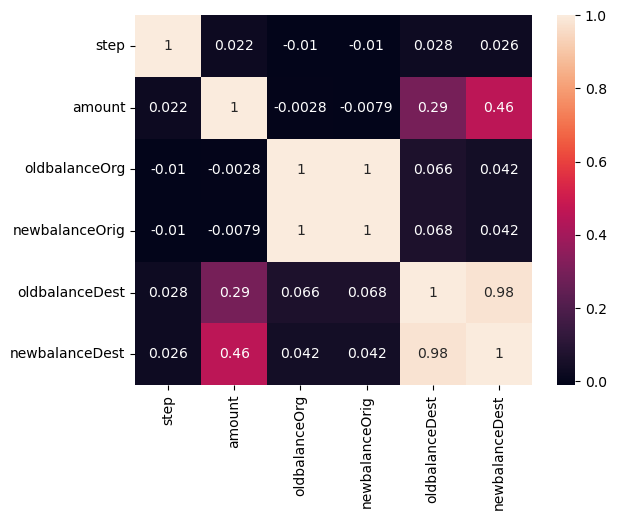

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data preprocessing

In [22]:
df.shape

(6362620, 10)

In [23]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True)#Removing unnecessary columns
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [24]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


##REMOVAL OF OUTLIERS

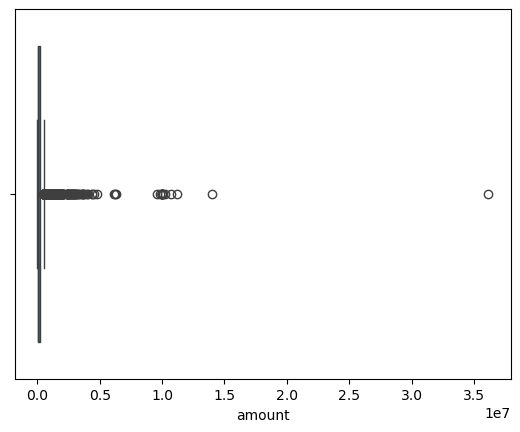

In [25]:
sns.boxplot(x=df["amount"].sample(10000))
plt.show()

### REMOVAL OF OUTLIERS BY TRANSFORMATION METHOD

In [26]:
num=[var for var in df.columns if df[var].dtype!='O' and var!='isFraud']
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [27]:
from scipy import stats
num = df.select_dtypes(include=["int64", "float64"]).columns
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

<Axes: >

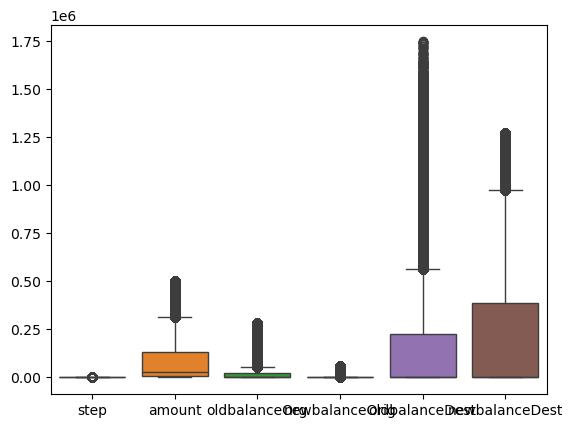

In [28]:
sns.boxplot(df)

##LABEL ENCODING

In [29]:
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])

In [30]:
df["type"].value_counts()

type
3    1629609
1    1351509
4     151476
0      44613
2      22085
Name: count, dtype: int64

In [31]:
x=df.drop("isFraud",axis=1)
y=df["isFraud"]

In [32]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0
5,1,3,7817.71,53860.0,46042.29,0.0,0.0


In [33]:
y.head()

1    is not Fraud
2        is Fraud
3        is Fraud
4    is not Fraud
5    is not Fraud
Name: isFraud, dtype: object

### Train test split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Model Building

## 1.RandomForest clasifier

In [35]:
rfc=RandomForestClassifier(
    n_estimators=30,    
    max_depth=8,        
    random_state=42,
    n_jobs=-1
)
rfc.fit(x_train,y_train)
y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test, y_test_predict1)
print("Test Accuracy:",round(test_accuracy,16))

Test Accuracy: 0.9996436714963766


In [36]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
print("Train Accuracy:",round(train_accuracy, 1))

Train Accuracy: 1.0


In [37]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,257,223
is not Fraud,5,639374


In [38]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.98      0.54      0.69       480
is not Fraud       1.00      1.00      1.00    639379

    accuracy                           1.00    639859
   macro avg       0.99      0.77      0.85    639859
weighted avg       1.00      1.00      1.00    639859



# 2.Decision Tree classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.999659299939518

In [40]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [41]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,361,119
is not Fraud,99,639280


In [42]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.78      0.75      0.77       480
is not Fraud       1.00      1.00      1.00    639379

    accuracy                           1.00    639859
   macro avg       0.89      0.88      0.88    639859
weighted avg       1.00      1.00      1.00    639859



In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
etc = ExtraTreesClassifier(
    n_estimators=30,      # fewer trees = faster
    max_depth=8,          # limit tree depth
    random_state=42,
    n_jobs=-1
)
etc.fit(x_train, y_train)
y_test_predict3 = etc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict3)
print("Extra Trees Test Accuracy:", round(test_accuracy, 16))

Extra Trees Test Accuracy: 0.99927484023824


In [44]:
y_train_predict3 = etc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict3)
print("Train Accuracy:",round(train_accuracy, 1))

Train Accuracy: 1.0


In [45]:
pd.crosstab(y_test, y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,16,464
is not Fraud,0,639379


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       1.00      0.03      0.06       480
is not Fraud       1.00      1.00      1.00    639379

    accuracy                           1.00    639859
   macro avg       1.00      0.52      0.53    639859
weighted avg       1.00      1.00      1.00    639859



# 4.Confusion Matrix,Classification Report,Proper preprocessing

In [47]:
import pandas as pd
conf_matrix = pd.crosstab(
    y_test,
    y_test_predict1,
    rownames=["Actual"],
    colnames=["Predicted"]
)
print(conf_matrix)

Predicted     is Fraud  is not Fraud
Actual                              
is Fraud           257           223
is not Fraud         5        639374


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.98      0.54      0.69       480
is not Fraud       1.00      1.00      1.00    639379

    accuracy                           1.00    639859
   macro avg       0.99      0.77      0.85    639859
weighted avg       1.00      1.00      1.00    639859



In [49]:
# Encode categorical columns
df = pd.get_dummies(df)
# Target column after encoding
# Show columns
print(df.columns)
# Automatically find fraud column
target = [col for col in df.columns if "fraud" in col.lower()][0]
print("Target column:", target)
# Split
y = df[target]
X = df.drop(target, axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud_is Fraud',
       'isFraud_is not Fraud'],
      dtype='object')
Target column: isFraud_is Fraud


In [50]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud_is Fraud',
       'isFraud_is not Fraud'],
      dtype='object')

In [51]:
la= LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [52]:
y_test1=la.transform(y_test)

In [53]:
y_test1=la.transform(y_test)

In [54]:
y_test1

array([0, 0, 0, ..., 0, 0, 0], shape=(639859,))

In [55]:
y_train1

array([0, 0, 0, ..., 0, 0, 0], shape=(2559433,))

In [56]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)
y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
print(test_accuracy)

1.0


In [57]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

1.0

# Saving the model

In [58]:
import pickle
pickle.dump(xgb1,open("model.pkl","wb"))